# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Configure Visualization Defaults
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
adDataRaw = pd.read_csv('advertising.csv')
adData = adDataRaw.copy(deep = True)

**Check some samples of ad_data**

In [8]:
adData.sample(6)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
412,68.82,20,38609.20,205.64,Cross-platform client-server hierarchy,Ramirezland,1,Bolivia,2016-07-11 15:45:23,0
768,68.58,41,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,2016-07-06 12:04:29,1
930,80.94,36,60803.00,239.94,Self-enabling local strategy,North Tiffany,0,Bermuda,2016-01-01 05:31:22,0
568,64.51,42,79484.80,190.71,Virtual 5thgeneration neural-net,Edwardmouth,1,Madagascar,2016-04-29 07:49:01,0
748,45.11,58,39799.73,195.69,Sharable reciprocal project,Browntown,0,Netherlands,2016-01-05 16:26:44,1
698,86.76,28,48679.54,189.91,Object-based leadingedge complexity,Lawrenceborough,0,Syrian Arab Republic,2016-02-10 08:21:13,0


**Use info and describe() on ad_data**

In [9]:
adData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [10]:
adData.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Front-line bifurcated ability,Lisamouth,NaN,France,2016-06-14 07:02:09,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


### Converting Formats
- We're trying to convert the `Timestamp` Column from `String` to date, and then split it into `DayOfWeek`, `Month`, and `Year`.

In [38]:
type(adData['Timestamp'][0])

str

In [39]:
adData['Timestamp'] = pd.to_datetime(adData['Timestamp'])
type(adData['Timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

**Now, we can grap a specific attributes from a Datetime object by just calling them**

In [49]:
time = adData['Timestamp'].iloc[0]
time.day

27

In [84]:
adData['Hour'] = adData['Timestamp'].apply(lambda time: time.hour)
adData['Month'] = adData['Timestamp'].apply(lambda time: time.month)
adData['DayOfWeek'] = adData['Timestamp'].apply(lambda time: time.dayofweek)

In [85]:
adData.sample(6)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month,DayOfWeek,AgeBin,AreaIncomeBin,AgeBin_Code,AreaIncomeBin_Code
303,77.56,38,63336.85,130.83,Right-sized multi-tasking solution,Port Angelamouth,1,Uganda,2016-05-19 03:52:24,1,3,5,3,"(35.8, 44.2]","(57012.3, 65470.635]",2,2
814,85.78,34,50038.65,232.78,Persistent fault-tolerant service-desk,Valerieland,0,Swaziland,2016-07-20 21:53:42,0,21,7,2,"(27.4, 35.8]","(47031.802, 57012.3]",1,1
228,70.68,31,74430.08,199.08,Configurable multi-state utilization,Robertbury,0,Colombia,2016-07-17 01:58:53,0,1,7,6,"(27.4, 35.8]","(65470.635, 79484.8]",1,3
114,69.00,32,72683.35,221.21,Virtual composite model,Port Susan,1,Trinidad and Tobago,2016-02-11 04:37:34,0,4,2,3,"(27.4, 35.8]","(65470.635, 79484.8]",1,3
866,86.58,32,60151.77,195.93,Business-focused asynchronous budgetary manage...,Henryfort,1,Mexico,2016-02-26 23:44:44,0,23,2,4,"(27.4, 35.8]","(57012.3, 65470.635]",1,2
314,84.29,41,60638.38,232.54,Re-contextualized systemic time-frame,Jacksonmouth,0,Niue,2016-01-27 20:47:57,0,20,1,2,"(35.8, 44.2]","(57012.3, 65470.635]",2,2


In [75]:
adData.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month,DayOfWeek
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,Front-line bifurcated ability,Lisamouth,NaN,France,2016-01-31 05:12:44,NaN,NaN,NaN,Sun
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN,NaN,NaN,159
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01 02:52:10,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-24 00:22:16,NaN,NaN,NaN,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000,11.660000,3.817000,NaN
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025,6.960952,1.926973,NaN
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000,0.000000,1.000000,NaN
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000,6.000000,2.000000,NaN


**Question:** Is there any NaN value in any column?

In [54]:
print("Number of (NaN) value in each column")
print('='*30)
adData.isnull().sum()

Number of (NaN) value in each column


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
Hour                        0
Month                       0
DayOfWeek                   0
dtype: int64

### Data binning for `Age` & `Area Income`:

In [79]:
adData['AgeBin'] = pd.cut(adData['Age'].astype(int), 5)
adData['AreaIncomeBin'] = pd.qcut(adData['Area Income'], 4)

In [81]:
adData.sample(6)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month,DayOfWeek,AgeBin,AreaIncomeBin
236,76.77,36,58348.41,123.51,Universal even-keeled analyzer,Harveyport,0,Turks and Caicos Islands,2016-05-04 00:01:33,1,0,5,Wed,"(35.8, 44.2]","(57012.3, 65470.635]"
355,87.09,36,57737.51,221.98,Synergized coherent interface,Luischester,1,Reunion,2016-04-21 16:10:50,0,16,4,Thu,"(35.8, 44.2]","(57012.3, 65470.635]"
840,72.46,40,56683.32,113.53,Enhanced tertiary utilization,Cervantesshire,0,Malawi,2016-05-01 09:23:25,1,9,5,Sun,"(35.8, 44.2]","(47031.802, 57012.3]"
96,45.72,36,22473.08,154.02,Versatile homogeneous capacity,Williammouth,1,Hong Kong,2016-04-19 15:14:58,1,15,4,Tue,"(35.8, 44.2]","(13996.499, 47031.802]"
390,78.83,36,66050.63,234.64,Future-proofed responsive matrix,New Wanda,1,Qatar,2016-05-08 12:08:26,0,12,5,Sun,"(35.8, 44.2]","(65470.635, 79484.8]"
942,79.51,39,34942.26,125.11,Proactive non-volatile encryption,North Charlesbury,1,Brunei Darussalam,2016-03-06 09:33:46,1,9,3,Sun,"(35.8, 44.2]","(13996.499, 47031.802]"


### Labeling

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
label = LabelEncoder()
adData['AgeBin_Code'] = label.fit_transform(adData['AgeBin'])
adData['AreaIncomeBin_Code'] = label.fit_transform(adData['AreaIncomeBin'])

In [88]:
adData.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Month', 'DayOfWeek', 'AgeBin',
       'AreaIncomeBin', 'AgeBin_Code', 'AreaIncomeBin_Code'],
      dtype='object')

In [89]:
# Define y variable aka target
Target = ['Clicked on Ad']

# Define x variables for original features aka feature selection
### Pretty name/values for charst & algorithm calculation
Data_x = ['Daily Time Spent on Site', 'Age', 'Area Income',
          'Daily Internet Usage', 'Male', 'Hour', 'Month', 'DayOfWeek']
Data_xy = Target + Data_x
print('Original X Y: ', Data_xy, '\n')

# Define x variables for original w/bin features to remove continues variables
Data_x_bin = ['Male', 'Hour', 'Month', 'DayOfWeek',
              'AgeBin_Code', 'AreaIncomeBin_Code']
Data_xy_bin = Target + Data_x_bin
print('Bin X Y: ', Data_xy_bin, '\n')

Original X Y:  ['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Hour', 'Month', 'DayOfWeek'] 

Bin X Y:  ['Clicked on Ad', 'Male', 'Hour', 'Month', 'DayOfWeek', 'AgeBin_Code', 'AreaIncomeBin_Code'] 



## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

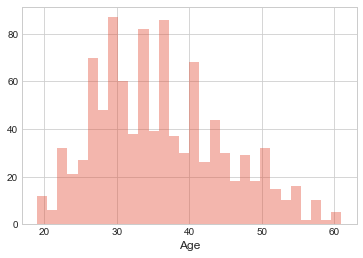

In [15]:
sns.distplot(adData['Age'], bins=30, kde=False)

**Create a jointplot showing Area Income versus Age.**

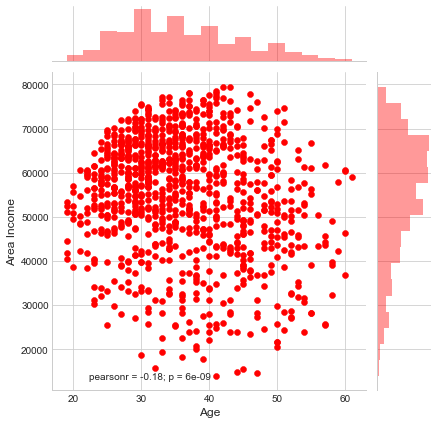

In [33]:
sns.jointplot(x='Age', y='Area Income', data=adData, color='red')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

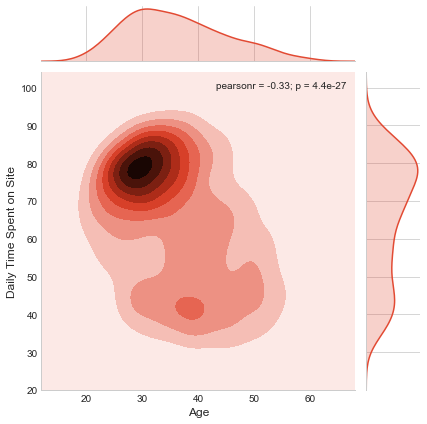

In [65]:
sns.jointplot(y='Daily Time Spent on Site', x='Age', data=adData, kind='kde')

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

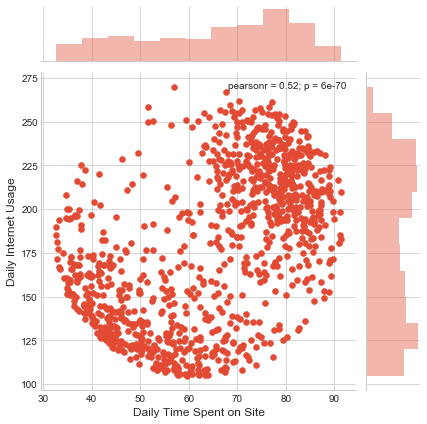

In [67]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=adData, kind='scatter')

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

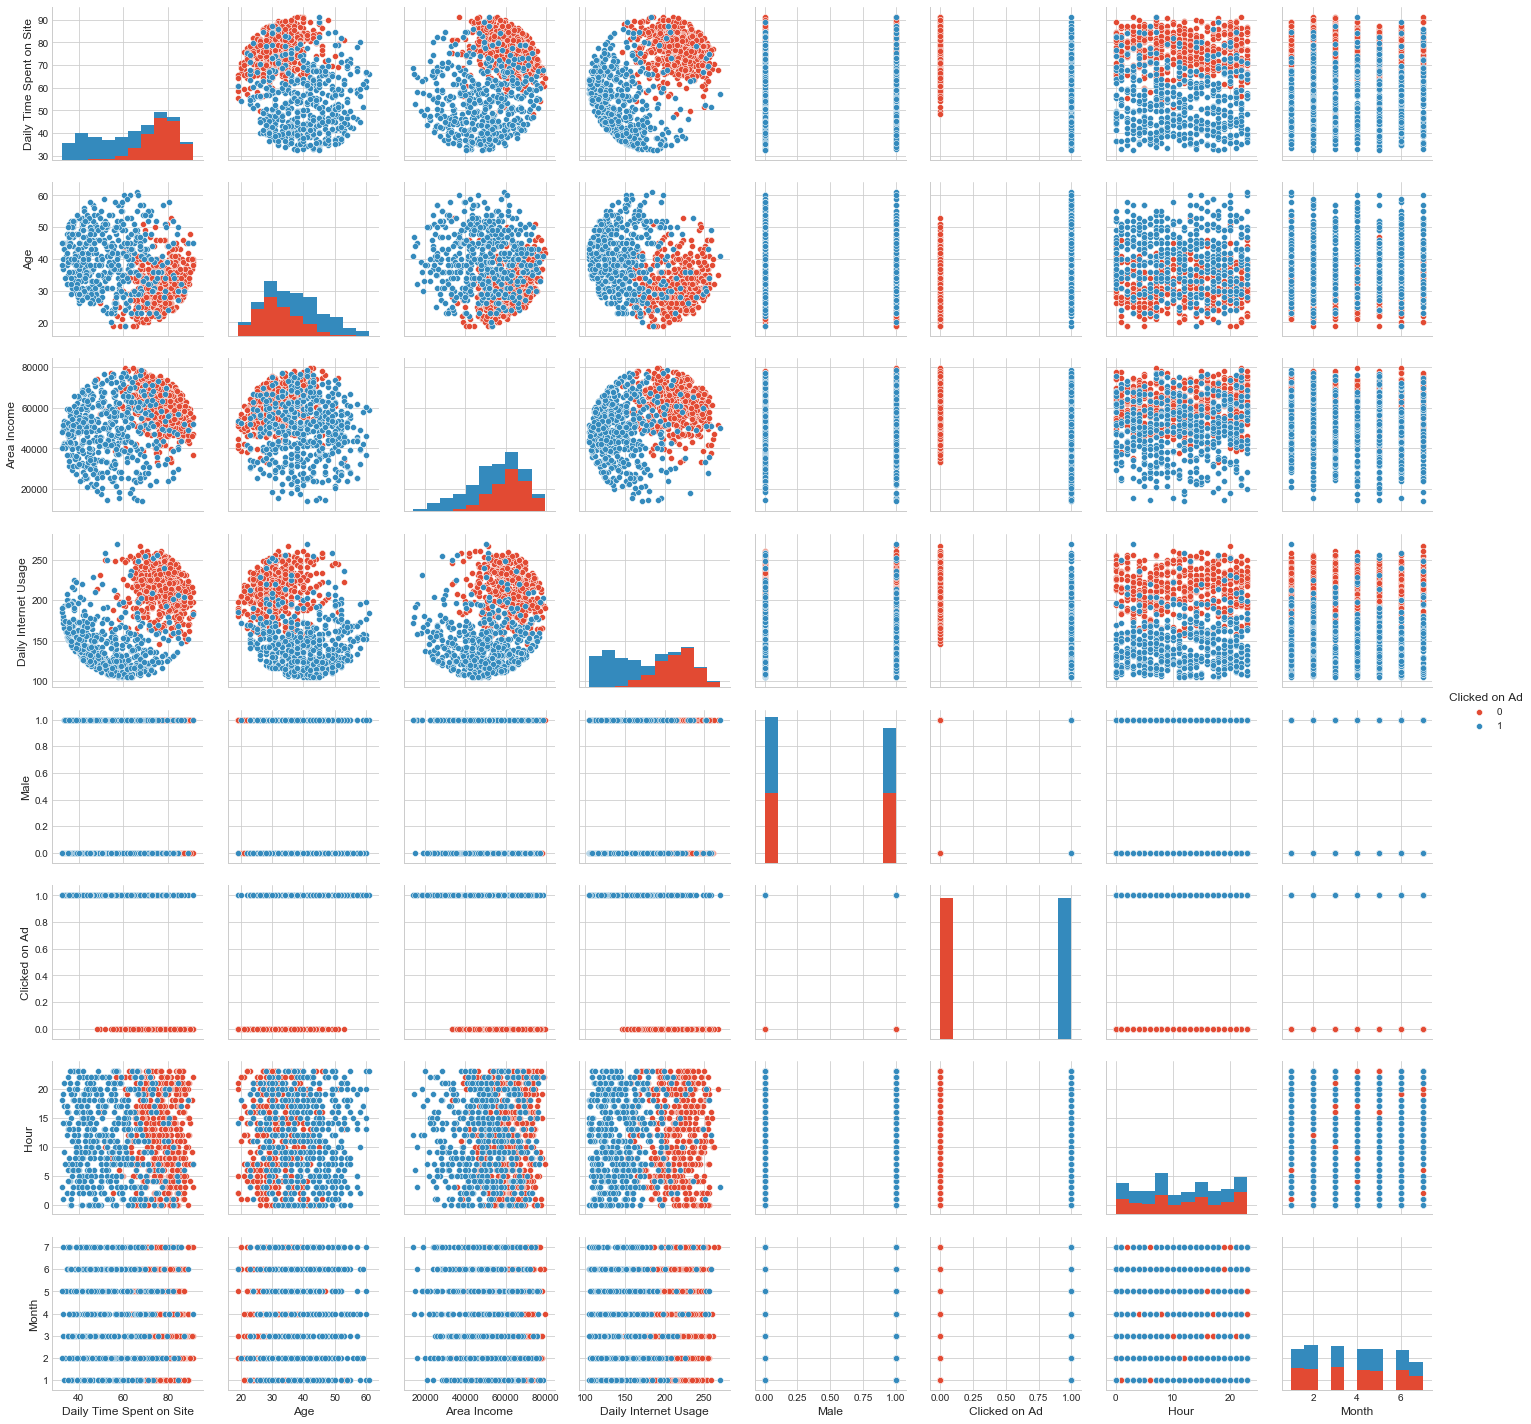

In [68]:
sns.pairplot(adData, hue='Clicked on Ad')

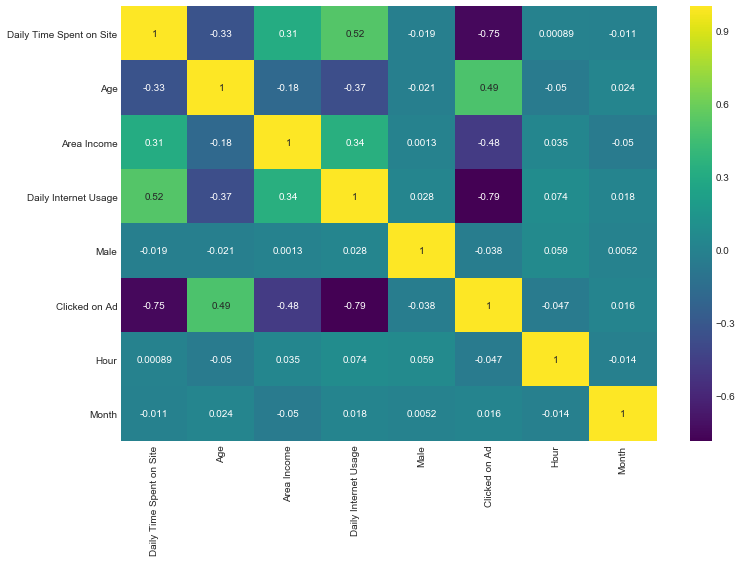

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(adData.corr(), annot=True, cmap='viridis')

# Split Training and Testing Data

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [90]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    adData[Data_x], adData[Target], test_size=0.33, random_state=0)

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    adData[Data_x_bin], adData[Target], test_size=0.33, random_state=0)

print("Data Shape: ", adData.shape)
print("Train Shape: ", X_train.shape)
print('Test Shape: ', X_test.shape)

X_train_bin.head()

Data Shape:  (1000, 17)
Train Shape:  (670, 8)
Test Shape:  (330, 8)


,Male,Hour,Month,DayOfWeek,AgeBin_Code,AreaIncomeBin_Code
863,1,23,2,1,2,3
748,0,16,1,1,4,0
64,0,0,6,4,3,3
798,1,23,2,6,3,3
52,1,9,1,6,3,1


**Train and fit a logistic regression model on the training set.**

In [96]:
from sklearn.linear_model import LogisticRegression

In [98]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr2 = LogisticRegression()
lr2.fit(X_train_bin, y_train_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [99]:
y_pred = lr.predict(X_test)
y_pred2 = lr2.predict(X_test_bin)

**Create a classification report for the model.**

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

In [102]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       179
          1       0.94      0.90      0.92       151

avg / total       0.93      0.93      0.93       330



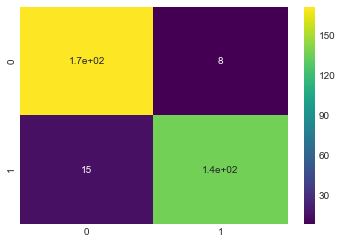

In [117]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')

In [103]:
print(classification_report(y_test_bin, y_pred2))

             precision    recall  f1-score   support

          0       0.81      0.80      0.81       179
          1       0.77      0.78      0.77       151

avg / total       0.79      0.79      0.79       330



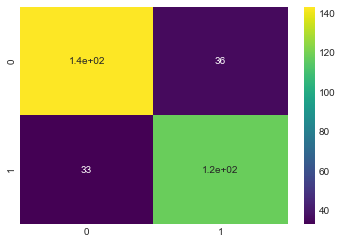

In [118]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='viridis')

### Model with Cross Validation

In [104]:
from sklearn.model_selection import cross_validate, ShuffleSplit

In [120]:
lr = LogisticRegression()
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, 
                        train_size = .6, random_state = 0)
base_results = cross_validate(lr, adData[Data_x], adData[Target],
                              cv = cv_split)
lr.fit(adData[Data_x], adData[Target])

print('LR Parameters: ', lr.get_params())
print('='*30)
print("LR Training score mean: {:.2f}".format(base_results['train_score'].mean()*100)) 
print("LR Test score mean: {:.2f}".format(base_results['test_score'].mean()*100))
print("LR Test score 3*std: +/- {:.2f}".format(base_results['test_score'].std()*100*3))

LR Parameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LR Training score mean: 91.22
LR Test score mean: 90.57
LR Test score 3*std: +/- 3.47


In [119]:
lr = LogisticRegression()
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, 
                        train_size = .6, random_state = 0)
base_results = cross_validate(lr, adData[Data_x_bin], adData[Target],
                              cv = cv_split)
lr.fit(adData[Data_x_bin], adData[Target])

print('LR Parameters: ', lr.get_params())
print('='*30)
print("LR Training w/bin score mean: {:.2f}".format(base_results['train_score'].mean()*100)) 
print("LR Test w/bin score mean: {:.2f}".format(base_results['test_score'].mean()*100))
print("LR Test w/bin score 3*std: +/- {:.2f}".format(base_results['test_score'].std()*100*3))

LR Parameters:  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LR Training w/bin score mean: 78.78
LR Test w/bin score mean: 77.00
LR Test w/bin score 3*std: +/- 4.84


## Great Job!